In [2]:
"""
Landon Buell
Qioayan Yu
Modeling Attack Functions
21 May 2020
"""

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def round_vals (x,n):
    """ Round activations x, to n decimals places """
    return np.round(x,n)

def noise (x):
    """ Add Noise from Gaussian to activations """
    shape = x.shape
    eps = np.random.normal(loc=0,scale=2,size=shape) 
    return x + eps

def Mute_MSB (x):
    """ Mute Most-Signfigicant bit in exponet of FP-64 """
    shape = x.shape                          # original shape
    mants,exps = np.frexp(x)                 # mantissa,exponent
    exps = np.array([0 if (e > 0) else e for e in exps.ravel()])
    x = np.ldexp(mants,exps.reshape(shape))   # reconstruct FP-64
    return x                                  # return new activations

In [34]:
def Scatter_Plot (xdata,ydata,title):
    """ Scatter Plot input Activations vs. Output Activations """
    plt.figure(figsize=(24,16))
    plt.title(title,size=80,weight='bold',pad=20)
    plt.xlabel("Input Value",size=60,weight='bold')
    plt.ylabel("Output Value",size=60,weight='bold')
    
    plt.scatter(xdata,ydata,c='blue',s=4)
    
    plt.grid()
    
    plt.xticks(np.arange(-1e3,+1e3+1,200),fontsize=40,rotation=15)
    plt.yticks(np.arange(-1.0,+1.1,0.25),fontsize=40,rotation=15)
    
    savename = title.replace(" ","_")
    plt.savefig(savename+'.png')
    
    plt.show()

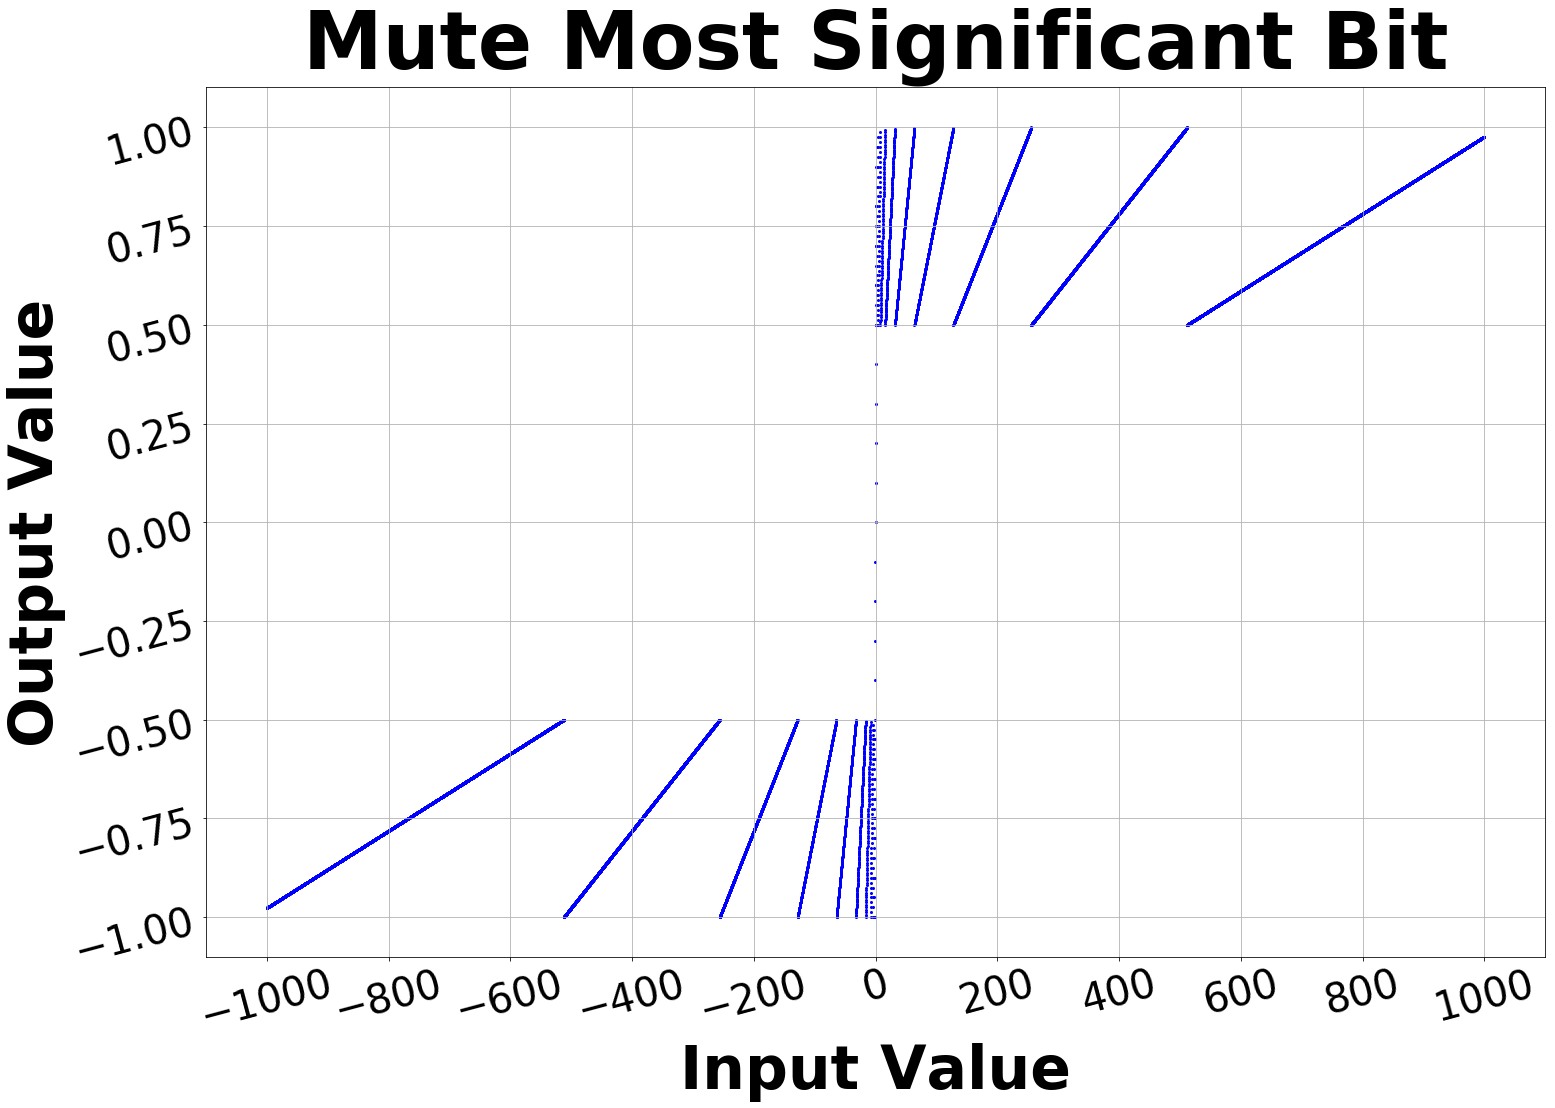

In [35]:
inputs = np.arange(-1e3,+1e3,0.1)
muted = Mute_MSB(inputs)

Scatter_Plot(inputs,muted,"Mute Most Significant Bit")

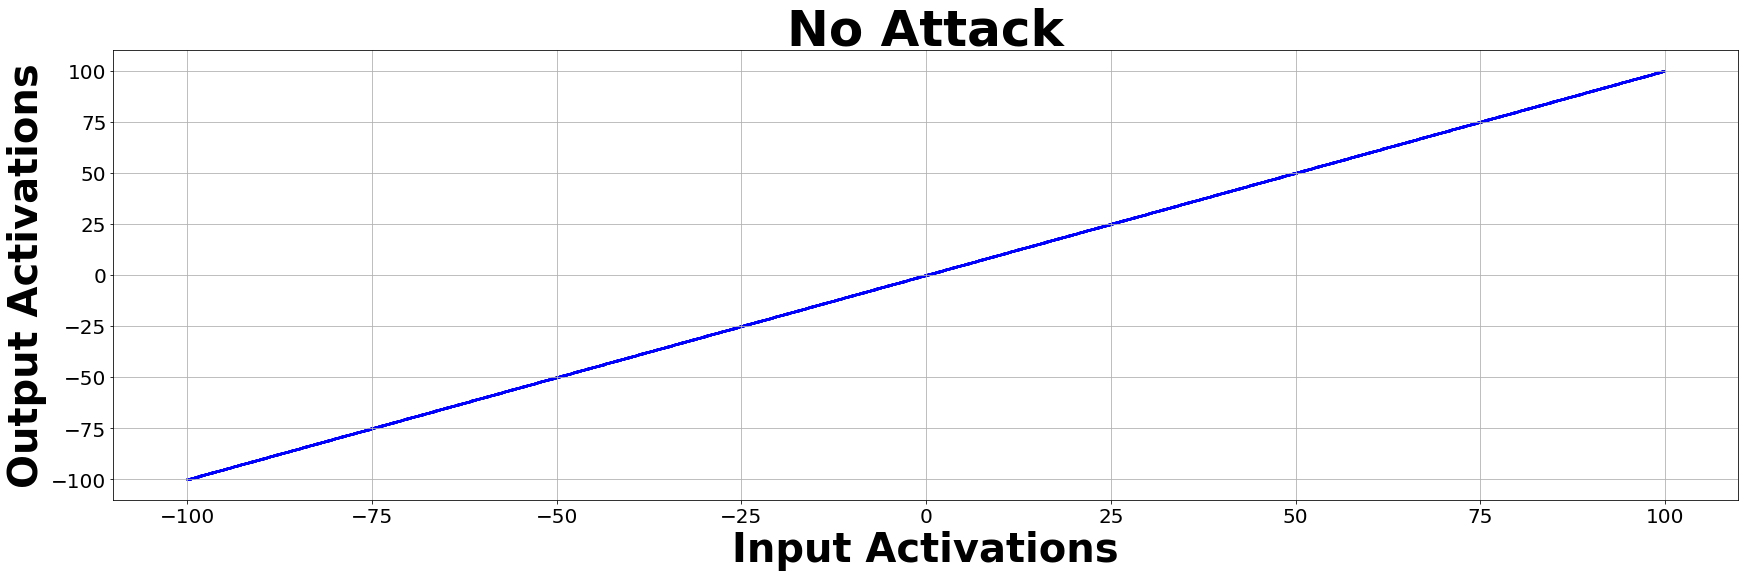

In [5]:
inputs = np.arange(-1e2,+1e2,0.1)
baseline = 1 * inputs

Scatter_Plot(inputs,baseline,'No Attack')


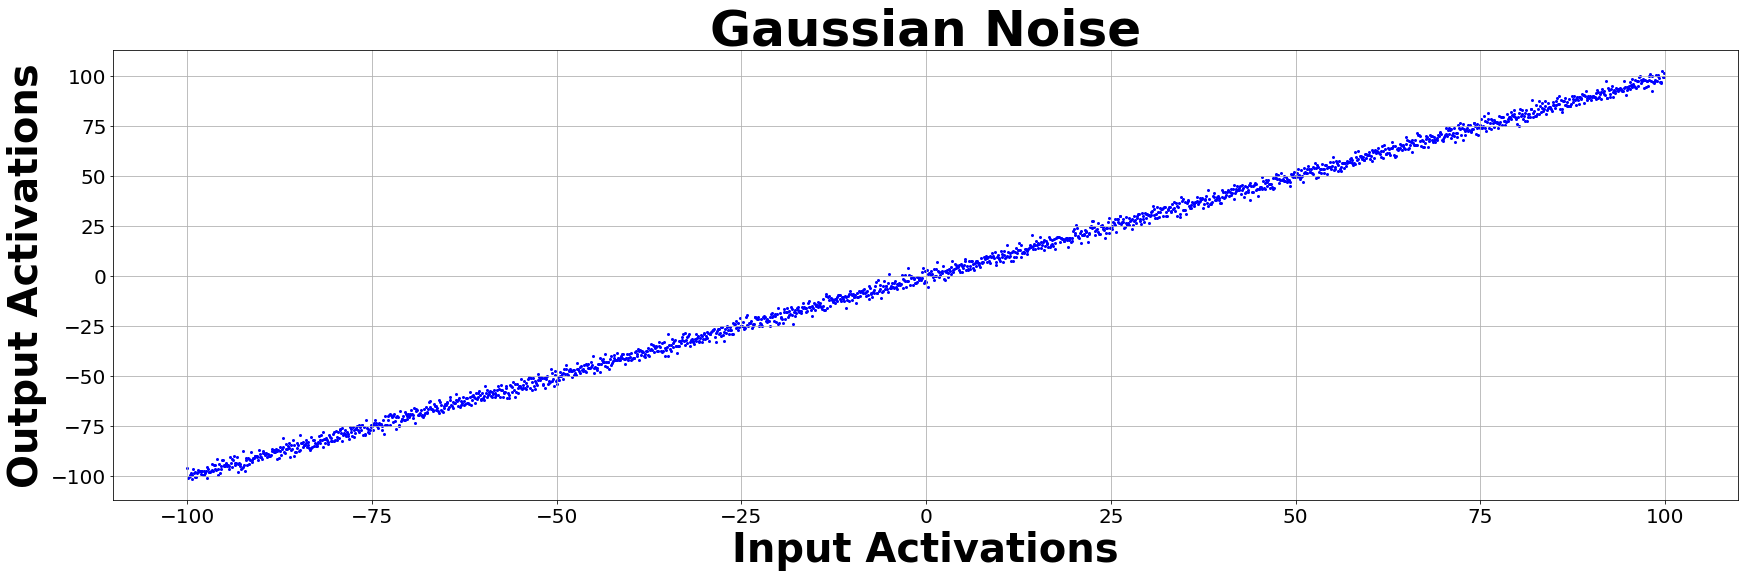

In [6]:
inputs = np.arange(-1e2,+1e2,0.1)

noisy = noise(inputs)

Scatter_Plot(inputs,noisy,'Gaussian Noise')

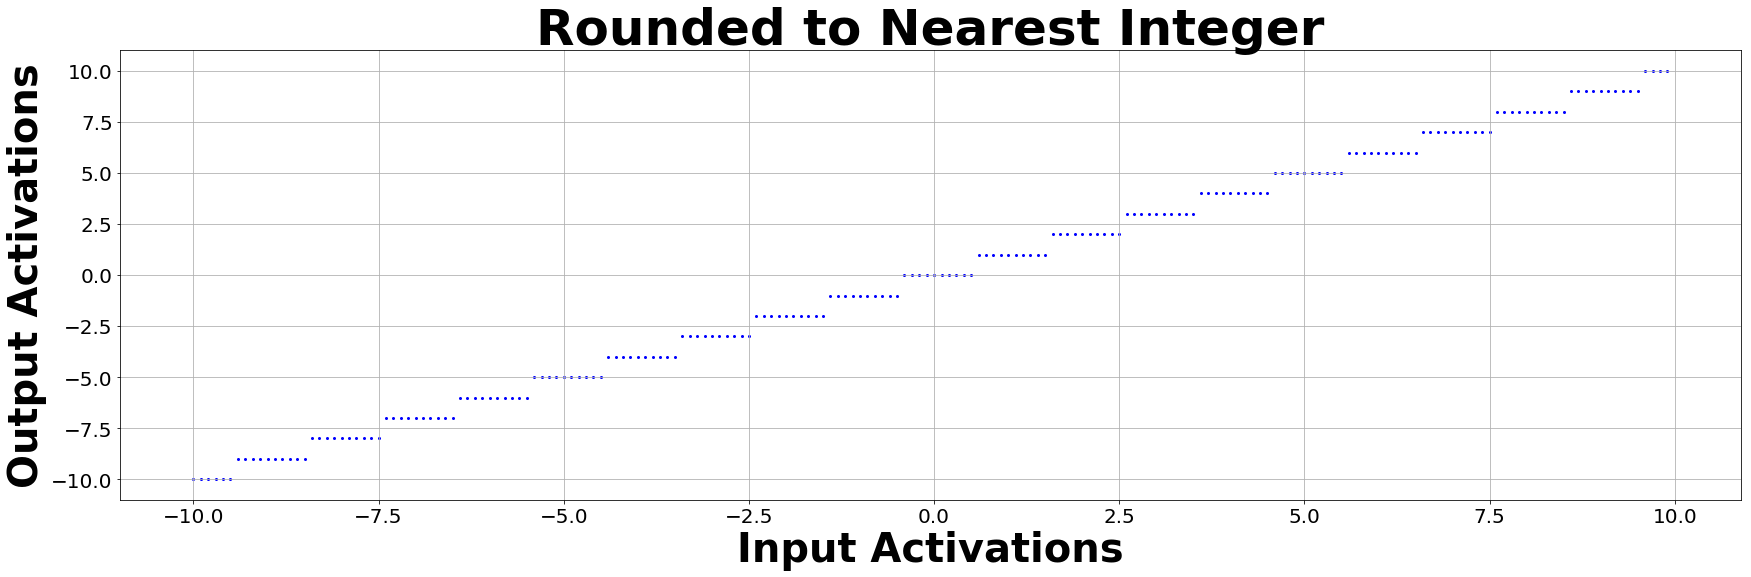

In [7]:
inputs = np.arange(-1e1,+1e1,0.1)
rounded = round_vals(inputs,n=0)

Scatter_Plot(inputs,rounded,"Rounded to Nearest Integer")

In [17]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

def plot_images (X,y):
    
    fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(20,8))
    
    for I in range (0,4,1):
        ax[I].set_title("Image Label: "+str(y[I]),size=30,weight='bold')
        ax[I].matshow(X[I].reshape(28,28),cmap=plt.cm.binary)
        ax[I].set_xticks([])
        ax[I].set_yticks([])
        
    plt.savefig("MNIST.png")
    plt.show()
    

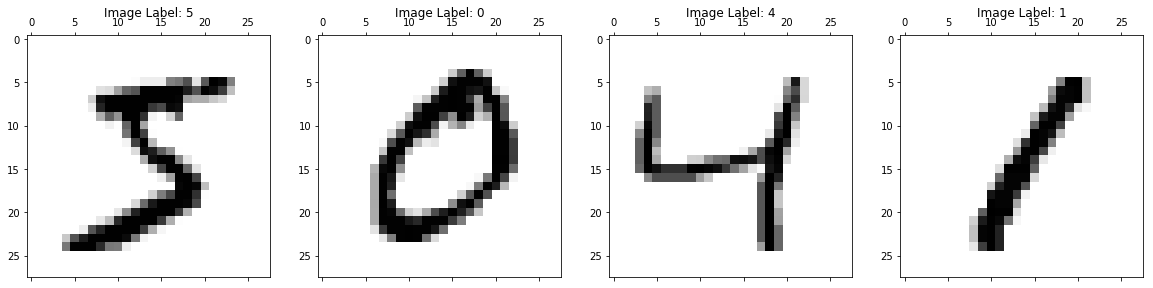

In [4]:
MNIST = fetch_openml('mnist_784',version=1)

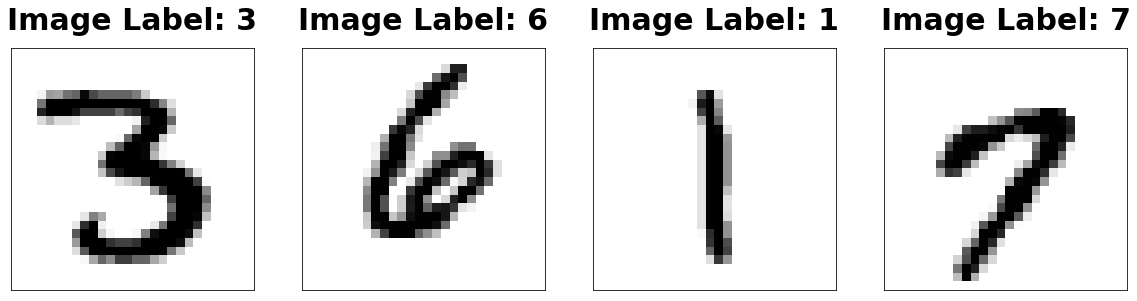

In [18]:
N = 12

X = MNIST['data'][N:N+4]
y = MNIST['target'][N:N+4]

plot_images(X,y)